In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
from sklearn.preprocessing import LabelEncoder
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [62]:
# Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

### 1. Importing the libraries & Reading the data file (10 points)



In [4]:
df = pd.read_csv("flipitnews-data.csv")

In [5]:
df

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,Business,cars pull down us retail figures us retail sal...
2221,Politics,kilroy unveils immigration policy ex-chatshow ...
2222,Entertainment,rem announce new glasgow concert us band rem h...
2223,Politics,how political squabbles snowball it s become c...


### 2. Exploring the dataset (10 points)
1. Shape of the dataset
1. News articles per category

In [24]:
print(f"Number of Rows = {df.shape[0]}")
print(f"Number of Columns = {df.shape[1]}")

Number of Rows = 2225
Number of Columns = 2


In [9]:
df.Category.value_counts()

Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64

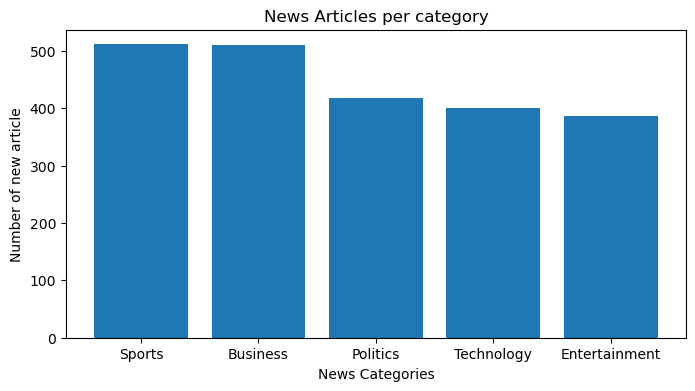

In [25]:
plt.figure(figsize=(8, 4))
plt.bar(df.Category.value_counts().index, df.Category.value_counts().values)
plt.title("News Articles per category")
plt.xlabel("News Categories")
plt.ylabel("Number of new article")
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


### 3. Processing the Textual Data i.e. the news articles (30 points)
1. Removing the non-letters
1. Tokenizing the text
1. Removing stopwords
1. Lemmatization

In [30]:
df.head(4)

,Category,Article,Category_id
0,Technology,tv future in the hands of viewers with home th...,4
1,Business,worldcom boss left books alone former worldc...,0
2,Sports,tigers wary of farrell gamble leicester say ...,3
3,Sports,yeading face newcastle in fa cup premiership s...,3


In [48]:
def remove_non_letters(text):
    words = text.split()
    # Define a regular expression pattern to match non-letters
    pattern = re.compile(r'[^a-zA-Z]')
    # Filter out non-letters from each word
    cleaned_words = [pattern.sub('', word) for word in words]
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

In [52]:
df['non-letters']=df['Article'].apply(remove_non_letters)
df.head()

,Category,Article,Category_id,non-letters
0,Technology,tv future in the hands of viewers with home th...,4,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...,0,worldcom boss left books alone former worldcom...
2,Sports,tigers wary of farrell gamble leicester say ...,3,tigers wary of farrell gamble leicester say th...
3,Sports,yeading face newcastle in fa cup premiership s...,3,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,1,ocean s twelve raids box office ocean s twelve...


In [53]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [56]:
def remove_stop_words(text):
    words = word_tokenize(text)

    stop_words = set(stopwords.words("english"))

    words = [word for word in words if word.lower() not in stop_words]

    words = " ".join(words)

    return words

In [59]:
df["no-stopwords"] = df['non-letters'].apply(remove_stop_words)
df.head()

,Category,Article,Category_id,non-letters,no-stopwords
0,Technology,tv future in the hands of viewers with home th...,4,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,Business,worldcom boss left books alone former worldc...,0,worldcom boss left books alone former worldcom...,worldcom boss left books alone former worldcom...
2,Sports,tigers wary of farrell gamble leicester say ...,3,tigers wary of farrell gamble leicester say th...,tigers wary farrell gamble leicester say rushe...
3,Sports,yeading face newcastle in fa cup premiership s...,3,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,1,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...


In [60]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...


True

In [70]:
def lemmatize_text(text):
    tokens = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]
    document = " ".join(tokens)

    return document

In [71]:
df['lemmatize_text'] = df['no-stopwords'].apply(lemmatize_text)

In [72]:
df.head()

,Category,Article,Category_id,non-letters,no-stopwords,lemmatize_text
0,Technology,tv future in the hands of viewers with home th...,4,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,0,worldcom boss left books alone former worldcom...,worldcom boss left books alone former worldcom...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,3,tigers wary of farrell gamble leicester say th...,tigers wary farrell gamble leicester say rushe...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,3,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,1,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...,ocean twelve raid box office ocean twelve crim...


In [68]:
df['no-stopwords']

0       tv future hands viewers home theatre systems p...
1       worldcom boss left books alone former worldcom...
2       tigers wary farrell gamble leicester say rushe...
3       yeading face newcastle fa cup premiership side...
4       ocean twelve raids box office ocean twelve cri...
                              ...                        
2220    cars pull us retail figures us retail sales fe...
2221    kilroy unveils immigration policy exchatshow h...
2222    rem announce new glasgow concert us band rem a...
2223    political squabbles snowball become commonplac...
2224    souness delight euro progress boss graeme soun...
Name: no-stopwords, Length: 2225, dtype: object

In [69]:
df['lemmatize_text']

0       tv future hand viewer home theatre system plas...
1       worldcom bos left book alone former worldcom b...
2       tiger wary farrell gamble leicester say rushed...
3       yeading face newcastle fa cup premiership side...
4       ocean twelve raid box office ocean twelve crim...
                              ...                        
2220    car pull u retail figure u retail sale fell ja...
2221    kilroy unveils immigration policy exchatshow h...
2222    rem announce new glasgow concert u band rem an...
2223    political squabble snowball become commonplace...
2224    souness delight euro progress bos graeme soune...
Name: lemmatize_text, Length: 2225, dtype: object

### 4. Encoding and Transforming the data (20 points)

1. Encoding the target variable
1. Bag of Words
1. TF-IDF
1. Train-Test Split

In [73]:
df['Category_id'] = LabelEncoder().fit_transform(df['Category'])

In [74]:
df.head()

,Category,Article,Category_id,non-letters,no-stopwords,lemmatize_text
0,Technology,tv future in the hands of viewers with home th...,4,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,0,worldcom boss left books alone former worldcom...,worldcom boss left books alone former worldcom...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,3,tigers wary of farrell gamble leicester say th...,tigers wary farrell gamble leicester say rushe...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,3,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,1,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...,ocean twelve raid box office ocean twelve crim...


In [81]:
# Bag od words
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['lemmatize_text'])
feature_name = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=feature_name)

In [94]:
bow_df

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aan,aara,aarhus,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatize_text'])
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

In [93]:
tfidf_df

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aan,aara,aarhus,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df.lemmatize_text).toarray()
y = np.array(df['Category'].values)

In [119]:
tf_idf = TfidfVectorizer()
X = tf_idf.fit_transform(df.lemmatize_text).toarray()
y = np.array(df['Category'].values)

In [135]:
choice = print("Choose \n (1) Bag of Words \n (2) TF-IDF ")
def vectorizer(choice):
    if choice == 1:
        cv = CountVectorizer(max_features=5000)
        X = cv.fit_transform(df.lemmatize_text).toarray()
        return X

    elif choice == 2:
        tf_idf = TfidfVectorizer()
        X = tf_idf.fit_transform(df.lemmatize_text).toarray()
        return X

    else:
        print("Wrong Input!")

Choose 
 (1) Bag of Words 
 (2) TF-IDF 


In [137]:
x = vectorizer(1)
y = np.array(df['Category_id'])

In [141]:
print(x.shape)
x

(2225, 5000)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [142]:
print(y.shape)

(2225,)


In [144]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [146]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1780, 5000), (445, 5000), (1780,), (445,))

### 5. Model Training & Evaluation (30 points)

1. Simple Approach
    - Naive Bayes


In [176]:
# Training the model
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [177]:
# Calculating the train & test accuracy -
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_test, nb.predict(X_test))

print("Train accuracy :{:.3f}".format(nb_train))
print("Test accuracy :{:.3f}".format(nb_test))

Train accuracy :0.990
Test accuracy :0.982


[0.9898876404494382, 0.9820224719101124] ['Train Accuracy', 'Test Accuracy']


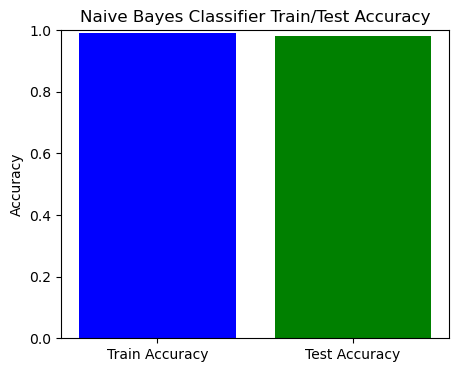

In [159]:
# Data
accuracies = [nb_train, nb_test]
labels = ['Train Accuracy', 'Test Accuracy']

print(accuracies, labels)
# Plot
plt.figure(figsize=(5, 4))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier Train/Test Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.show()


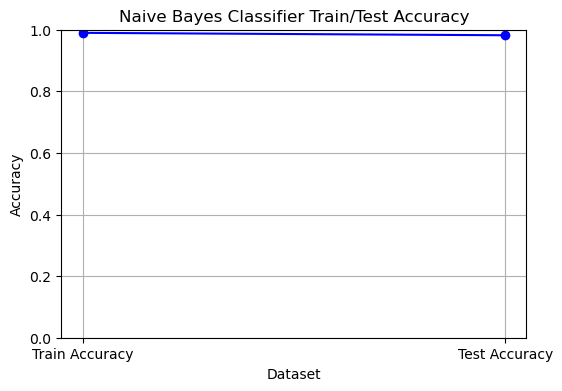

In [161]:
# Data
accuracies = [nb_train, nb_test]
labels = ['Train Accuracy', 'Test Accuracy']

# Plot
plt.figure(figsize=(6, 4))
plt.plot(labels, accuracies, marker='o', color='blue', linestyle='-')
plt.title('Naive Bayes Classifier Train/Test Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.grid(True)
plt.show()

In [163]:
# Making predictions on the test set
y_pred_nb = nb.predict(X_test)
y_pred_proba_nb = nb.predict_proba(X_test)
y_pred_nb, y_pred_proba_nb

(array([1, 3, 4, 3, 1, 4, 3, 4, 1, 2, 3, 4, 0, 3, 0, 1, 4, 3, 4, 0, 4, 1,
        3, 2, 3, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 3, 4, 3, 3, 3, 4, 2, 3, 3,
        4, 2, 2, 4, 4, 4, 1, 1, 1, 4, 0, 1, 3, 4, 3, 1, 2, 0, 1, 0, 2, 3,
        4, 3, 0, 0, 3, 3, 0, 0, 1, 3, 1, 0, 2, 3, 4, 2, 0, 0, 1, 1, 0, 3,
        0, 3, 4, 3, 2, 0, 0, 2, 4, 3, 1, 1, 3, 3, 1, 2, 1, 3, 0, 4, 3, 0,
        2, 2, 0, 3, 2, 4, 2, 1, 1, 3, 3, 4, 2, 3, 2, 0, 3, 2, 1, 0, 2, 4,
        0, 0, 2, 4, 2, 2, 4, 4, 0, 2, 3, 3, 3, 1, 4, 3, 2, 1, 4, 4, 4, 4,
        3, 4, 0, 2, 3, 3, 4, 2, 3, 1, 3, 2, 3, 3, 3, 0, 0, 4, 4, 1, 0, 3,
        0, 1, 4, 0, 4, 2, 2, 3, 2, 2, 3, 0, 1, 4, 3, 0, 2, 3, 3, 0, 4, 3,
        4, 3, 2, 1, 1, 1, 1, 4, 2, 1, 0, 2, 0, 0, 4, 4, 0, 3, 0, 3, 0, 3,
        2, 2, 3, 3, 4, 2, 2, 0, 2, 2, 1, 0, 4, 4, 4, 1, 3, 4, 3, 4, 3, 2,
        4, 1, 4, 0, 0, 3, 4, 3, 3, 1, 1, 3, 2, 1, 4, 0, 4, 3, 3, 2, 3, 3,
        0, 0, 3, 1, 2, 4, 1, 2, 0, 3, 2, 0, 0, 0, 1, 0, 2, 4, 3, 3, 1, 0,
        2, 1, 1, 0, 3, 2, 2, 1, 3, 1, 

In [164]:
# Computing the ROC AUC score -
print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_test, y_pred_proba_nb, multi_class='ovr')))

ROC AUC Score: 0.999


In [167]:
# Computing the precision, recall & f1 score -
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')

print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

Precision: 0.983
Recall: 0.982
F1 Score: 0.982


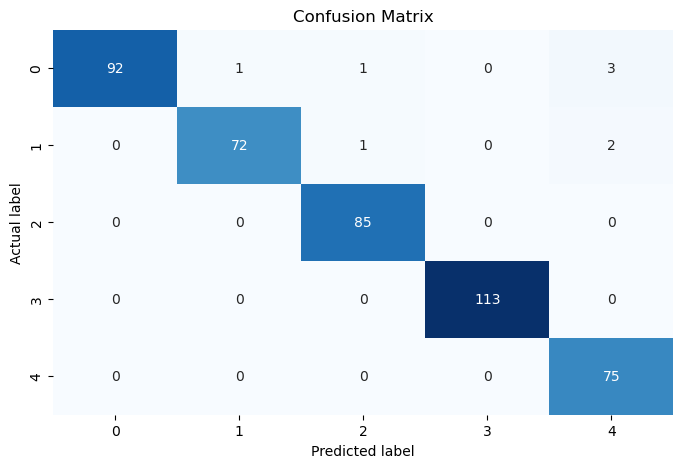

In [168]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [170]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        97
           1       0.99      0.96      0.97        75
           2       0.98      1.00      0.99        85
           3       1.00      1.00      1.00       113
           4       0.94      1.00      0.97        75

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445



2. Functionalized Code (Optional)
    - Decision Tree
    - Nearest Neighbors
    - Random Forest

In [183]:
def model_train(obj):
    obj.fit(X_train, y_train)
    y_pred = obj.predict(X_test)
    y_pred_proba = obj.predict_proba(X_test)
    return y_pred, y_pred_proba

def model_eval(obj, y_pred, y_pred_proba):
    print("-------------------------")

    # Calculating the train & test accuracy 
    train_acc = accuracy_score(y_train, obj.predict(X_train))
    test_acc = accuracy_score(y_test, obj.predict(X_test))

    print("Train Accuracy: {:.3f}".format(train_acc))
    print("Test Accuracy: {:.3f}\n".format(test_acc))

    # Computing the ROC AUC score
    print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_test, y_pred_proba, multi_class='ovr')))

    # Computing the precision, recall & f1 score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1 Score: {:.3f}".format(f1))

    print("-------------------------")

In [187]:
print("Decision Tree Classifier")
# Creating the model object -
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Training the model -
y_pred_dt, y_pred_proba_dt = model_train(dt)

# Evaluatong the model -
model_eval(dt, y_pred_dt, y_pred_proba_dt)

Decision Tree Classifier
-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.856

ROC AUC Score: 0.907

Precision: 0.855
Recall: 0.856
F1 Score: 0.855
-------------------------


In [190]:
print("Nearest Neighbors Classifier")
# Creating the model object -
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model -
y_pred_knn, y_pred_proba_knn = model_train(knn)

# Evaluatong the model -
model_eval(knn, y_pred_knn, y_pred_proba_knn)

Nearest Neighbors Classifier
-------------------------
Train Accuracy: 0.801
Test Accuracy: 0.744

ROC AUC Score: 0.937

Precision: 0.828
Recall: 0.744
F1 Score: 0.740
-------------------------


In [191]:
from sklearn.ensemble import RandomForestClassifier


print("Random Forest Classifier")

# Creating the model object -
rf = RandomForestClassifier()

# Training the model -
y_pred_rf, y_pred_proba_rf = model_train(rf)

# Evaluatong the model -
model_eval(rf, y_pred_rf, y_pred_proba_rf)

Random Forest Classifier
-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.971

ROC AUC Score: 0.998

Precision: 0.971
Recall: 0.971
F1 Score: 0.971
-------------------------


### __Observation__: `Among the models evaluated thus far, the Naive Bayes Classifier emerges as the top performer, showcasing commendable train and test accuracy, along with precision and recall rates that exceed expectations. Additionally, it demonstrates minimal signs of overfitting.`

## Questions

### How many news articles are present in the dataset that we have?

In [192]:
df.shape[0]

2225

### Most of the news articles are from _____ category.

In [194]:
df['Category'].value_counts()

Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64

In [193]:
df['Category'].value_counts().idxmax()

'Sports'

### Only ___ no. of articles belong to the ‘Technology’ category.

In [198]:
df['Category'].value_counts()[df['Category'].value_counts().index == 'Technology']

Category
Technology    401
Name: count, dtype: int64

### Why we should remove stop words ?
> They don't offer valuable insights, particularly when constructing a text classification model. Hence, it's necessary to eliminate stopwords from our dataset. Since stopwords occur frequently, their removal leads to a significantly smaller corpus. This reduction in size facilitates quicker computations on text data and enables the text classification model to contend with fewer features, ultimately yielding a more robust model.

### Explain the difference between Stemming and Lemmatization.
>Stemming involves truncating or removing the last few characters from a word, which can sometimes result in inaccuracies in meaning and spelling. For example, stemming the word 'Caring' might yield 'Care'. It's commonly employed in large datasets where performance is a concern.

>On the other hand, lemmatization takes into account the context of the word and converts it to its meaningful base form, known as a lemma. For instance, lemmatizing the word 'Caring' would also yield 'Care'. However, lemmatization is computationally intensive due to its reliance on look-up tables and other processes.







### Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?
>One limitation of the bag-of-words approach is its disregard for the semantic meanings of words. For instance, the phrase "not bad" typically conveys a positive sentiment, suggesting something decent or even good. However, when considered individually, both "not" and "bad" carry negative connotations.

>Alternative methods, such as the Bag-of-n-Grams approach, aim to address this issue by incorporating sequences of words (bigrams, trigrams) that frequently appear together. However, this can lead to an expansion of the feature space.

>In TF-IDF (Term Frequency-Inverse Document Frequency), the logarithmic transformation tends to diminish the importance of words that appear in all documents, effectively excluding them from the feature set. Consequently, TF-IDF amplifies the significance of rare words while downplaying the relevance of common ones.

### What’s the shape of train & test data sets after performing a 75:25 split.

In [201]:
X_train, X_test, y_train, y_test = train_test_split(df['Article'], df['Category_id'], random_state=0)
print("Train Shape :", X_train.shape)
print("Test Shape :", X_test.shape)

Train Shape : (1668,)
Test Shape : (557,)


### Which of the following is found to be the best performing model:
1. Random Forest
1. Nearest Neighbors
1. Naive Bayes

```python
        Random Forest Classifier
        -------------------------
        Train Accuracy: 1.000
        Test Accuracy: 0.971

        ROC AUC Score: 0.998

        Precision: 0.971
        Recall: 0.971
        F1 Score: 0.971
        -------------------------
```
Based on the provided evaluation metrics, the Random Forest Classifier appears to be the best performing model:

* It achieves the highest test accuracy (0.971) among the three models.
* The ROC AUC score of 0.998 indicates excellent performance in distinguishing between classes.
* The precision, recall, and F1 score are also high, all at 0.971, suggesting a balanced performance in classification tasks.
Therefore, the Random Forest Classifier outperforms the Decision Tree Classifier and Nearest Neighbors Classifier in this scenario.

### According to this particular use case, both precision and recall are equally important. (T/F)
> __False__, In the context of modeling rare cancer data, neglecting false negatives is deemed unacceptable. In this scenario, prioritizing recall over precision is crucial.

>However, when it comes to YouTube recommendations, false negatives are of lesser concern. Here, precision holds greater significance.